# **CASE: INVESTIMENTO EM AÇÕES**

---

### Instalação de bibliotecas

In [ ]:
# Para cálculo do VIF
install.packages("rms")
# Para cálculo do KS e AUC
install.packages("ROCR")

### Carregamento de bibliotecas

In [1]:
library(rms)
library(ROCR)

Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




### Leitura da base de dados

In [4]:
dados_investimento <- read.table(file = "../Dados/Investimento_Acoes.txt",
                                 sep = "\t",
                                 dec = ".",
                                 header = TRUE)

### Visualização da base de dados

In [5]:
View(dados_investimento)

ID_Cliente,Investimento_Fixa,Investimento_Tesouro,Investimento_Poupanca,Rendimento_Liq_12M,Saldo_Conta,Investiu_Variavel_6M
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.00,5434.42,0.00,229.52,0.00,0
2,8240.53,4066.68,0.00,429.71,6145.54,0
3,3843.34,4757.95,0.00,65.21,0.00,0
4,2297.05,4201.29,0.00,308.23,0.00,0
5,2477.00,4146.93,0.00,156.40,1328.92,0
6,0.00,1224.36,0.00,44.74,1252.03,0
7,7581.91,6226.31,0.00,36.74,0.00,0
8,13175.12,8205.17,1218.63,13.82,0.00,0
9,8915.83,14130.66,0.00,912.88,0.00,0


### Análise exploratória breve

In [6]:
# Medidas resumo
summary(dados_investimento)

   ID_Cliente   Investimento_Fixa Investimento_Tesouro Investimento_Poupanca
 Min.   :   1   Min.   :    0     Min.   :    0        Min.   :    0.0      
 1st Qu.:1955   1st Qu.: 1420     1st Qu.: 1026        1st Qu.:    0.0      
 Median :3909   Median : 3036     Median : 2228        Median :    0.0      
 Mean   :3909   Mean   : 4131     Mean   : 3063        Mean   :  312.3      
 3rd Qu.:5863   3rd Qu.: 5813     3rd Qu.: 4427        3rd Qu.:    0.0      
 Max.   :7817   Max.   :39843     Max.   :26943        Max.   :15107.3      
 Rendimento_Liq_12M  Saldo_Conta      Investiu_Variavel_6M
 Min.   :   8.94    Min.   :    0.0   Min.   :0.00000     
 1st Qu.:  53.70    1st Qu.:    0.0   1st Qu.:0.00000     
 Median : 124.72    Median :    0.0   Median :0.00000     
 Mean   : 179.52    Mean   :  483.3   Mean   :0.07778     
 3rd Qu.: 247.37    3rd Qu.:  463.6   3rd Qu.:0.00000     
 Max.   :1473.21    Max.   :12572.7   Max.   :1.00000     

### Análise bivariada: variável resposta vs. variáveis explicativas

In [7]:
# Comando auxiliar para aumentar resolução do gráfico (recomendado apenas no Colab)
reset_options <- options()
options(repr.plot.width = 20, repr.plot.height = 7)

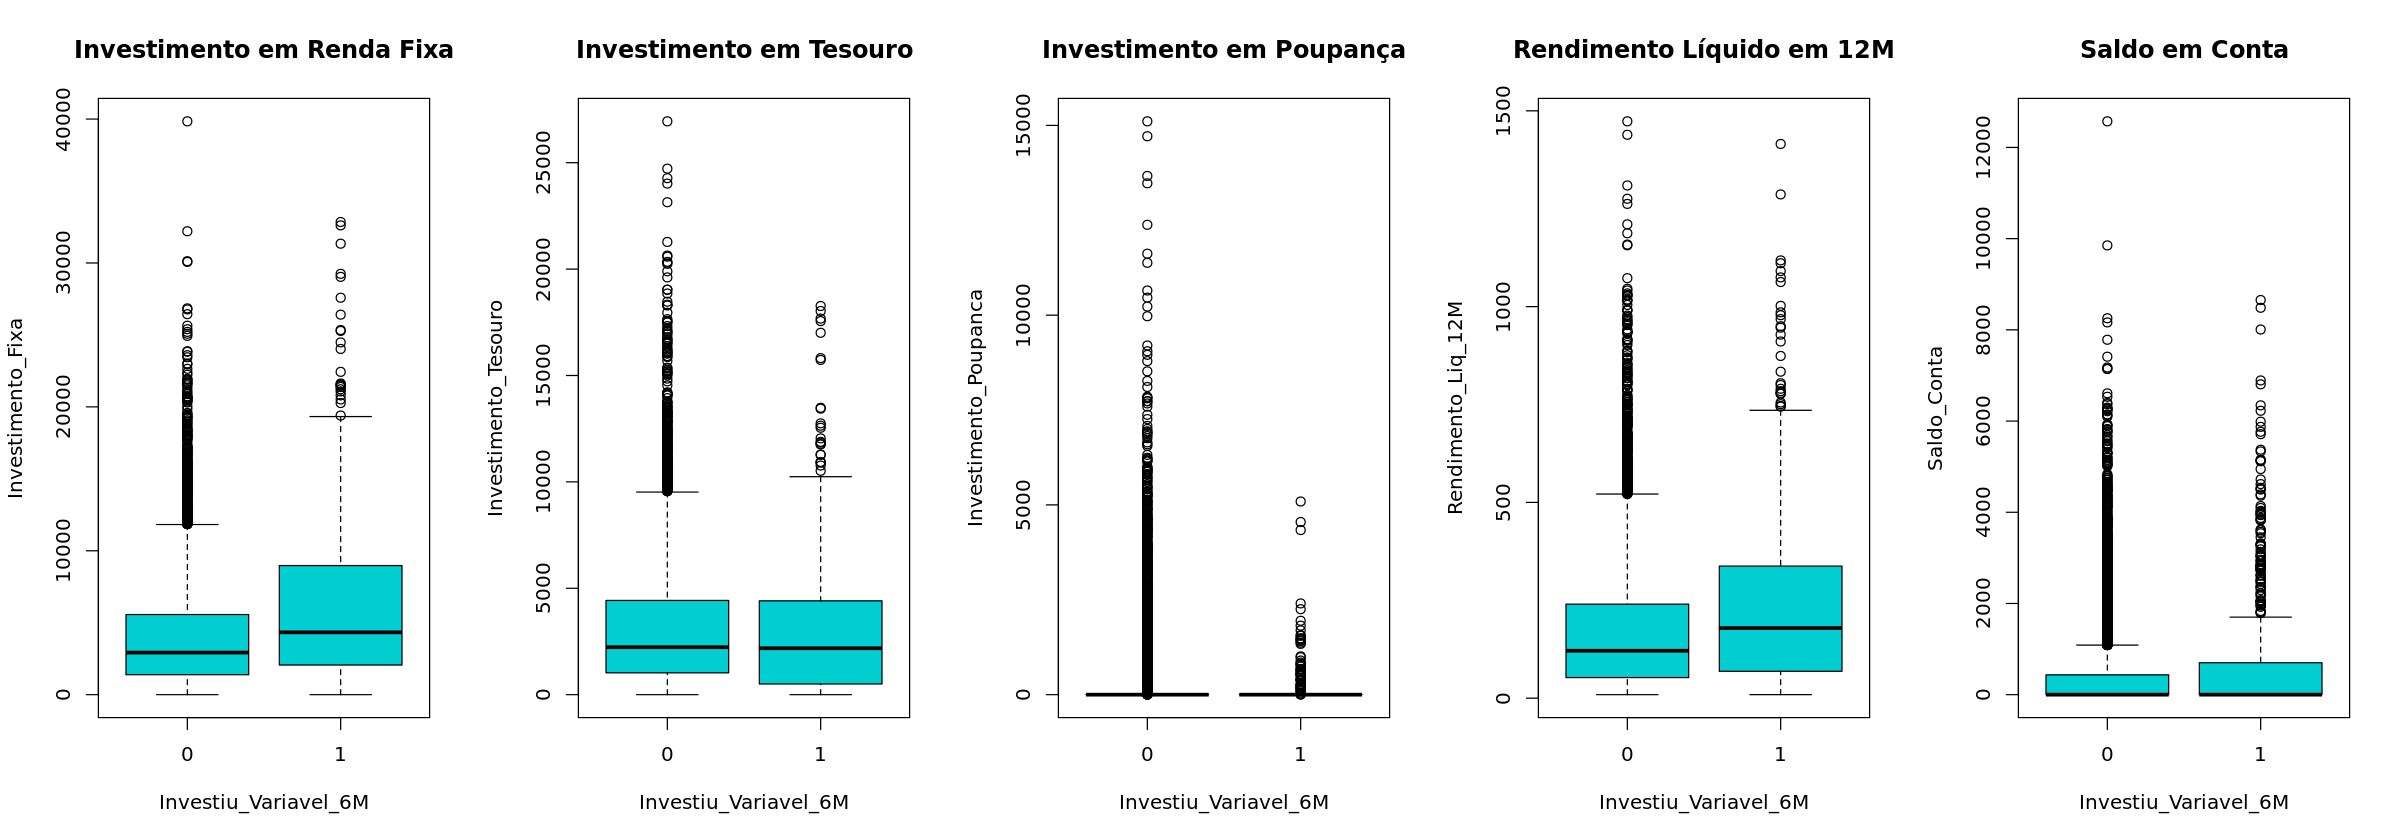

In [8]:
# Gráficos de boxplots
par(mfrow = c(1,5), cex = 1)
boxplot(Investimento_Fixa ~ Investiu_Variavel_6M,     data = dados_investimento, col = "darkturquoise", main = "Investimento em Renda Fixa")
boxplot(Investimento_Tesouro ~ Investiu_Variavel_6M,  data = dados_investimento, col = "darkturquoise", main = "Investimento em Tesouro")
boxplot(Investimento_Poupanca ~ Investiu_Variavel_6M, data = dados_investimento, col = "darkturquoise", main = "Investimento em Poupança")
boxplot(Rendimento_Liq_12M ~ Investiu_Variavel_6M,    data = dados_investimento, col = "darkturquoise", main = "Rendimento Líquido em 12M")
boxplot(Saldo_Conta ~ Investiu_Variavel_6M,           data = dados_investimento, col = "darkturquoise", main = "Saldo em Conta")

In [9]:
# Resetando parâmetros gráficos (recomendado apenas no Colab)
options(reset_options)

### Modelo de regressão logística múltipla

In [10]:
# Comando auxiliar para para omitir notação científica nos p-valores e controlar largura dos outputs na tela do Colab
options(scipen = 999, width = 200)

In [11]:
# Ajuste do modelo 1: inicial
regressao_1 <- glm(Investiu_Variavel_6M ~
                     Investimento_Fixa +
                     Investimento_Tesouro +
                     Investimento_Poupanca +
                     Rendimento_Liq_12M +
                     Saldo_Conta,
                   family = binomial(link = 'logit'),
                   data = dados_investimento)

summary(regressao_1)


Call:
glm(formula = Investiu_Variavel_6M ~ Investimento_Fixa + Investimento_Tesouro + 
    Investimento_Poupanca + Rendimento_Liq_12M + Saldo_Conta, 
    family = binomial(link = "logit"), data = dados_investimento)

Coefficients:
                         Estimate  Std. Error z value             Pr(>|z|)    
(Intercept)           -3.03374236  0.08096865 -37.468 < 0.0000000000000002 ***
Investimento_Fixa      0.00008317  0.00001087   7.648   0.0000000000000204 ***
Investimento_Tesouro  -0.00001037  0.00001534  -0.676              0.49906    
Investimento_Poupanca -0.00052821  0.00010053  -5.254   0.0000001486182413 ***
Rendimento_Liq_12M     0.00078165  0.00028365   2.756              0.00586 ** 
Saldo_Conta            0.00019513  0.00003278   5.953   0.0000000026284680 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4273.0  on 7816  degrees of freedom
Residual deviance: 4043.6  on 7811

In [12]:
# Ajuste do modelo 2: retirando Investimento_Tesouro
regressao_2 <- glm(Investiu_Variavel_6M ~
                     Investimento_Fixa +
                     Investimento_Poupanca +
                     Rendimento_Liq_12M +
                     Saldo_Conta,
                   family = binomial(link = 'logit'),
                   data = dados_investimento)

summary(regressao_2)


Call:
glm(formula = Investiu_Variavel_6M ~ Investimento_Fixa + Investimento_Poupanca + 
    Rendimento_Liq_12M + Saldo_Conta, family = binomial(link = "logit"), 
    data = dados_investimento)

Coefficients:
                         Estimate  Std. Error z value             Pr(>|z|)    
(Intercept)           -3.05918437  0.07194886 -42.519 < 0.0000000000000002 ***
Investimento_Fixa      0.00008578  0.00001011   8.484 < 0.0000000000000002 ***
Investimento_Poupanca -0.00052722  0.00010055  -5.243        0.00000015775 ***
Rendimento_Liq_12M     0.00068468  0.00024342   2.813              0.00491 ** 
Saldo_Conta            0.00019556  0.00003278   5.966        0.00000000244 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4273.0  on 7816  degrees of freedom
Residual deviance: 4044.1  on 7812  degrees of freedom
AIC: 4054.1

Number of Fisher Scoring iterations: 7


In [13]:
# Avaliação de colinearidade no modelo 2
data.frame(VIF = vif(regressao_2))

,VIF
,<dbl>
Investimento_Fixa,1.535397
Investimento_Poupanca,1.000747
Rendimento_Liq_12M,1.536669
Saldo_Conta,1.001571


In [14]:
# Ajuste do modelo 3: retirando Rendimento_Liq_12M (colinearidade)
regressao_3 <- glm(Investiu_Variavel_6M ~
                     Investimento_Fixa +
                     Investimento_Poupanca +
                     Saldo_Conta,
                   family = binomial(link = 'logit'),
                   data = dados_investimento)

summary(regressao_3)


Call:
glm(formula = Investiu_Variavel_6M ~ Investimento_Fixa + Investimento_Poupanca + 
    Saldo_Conta, family = binomial(link = "logit"), data = dados_investimento)

Coefficients:
                          Estimate   Std. Error z value             Pr(>|z|)    
(Intercept)           -2.999416204  0.068369380 -43.871 < 0.0000000000000002 ***
Investimento_Fixa      0.000102193  0.000008159  12.526 < 0.0000000000000002 ***
Investimento_Poupanca -0.000523673  0.000100636  -5.204        0.00000019541 ***
Saldo_Conta            0.000193633  0.000032805   5.903        0.00000000358 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4273.0  on 7816  degrees of freedom
Residual deviance: 4051.8  on 7813  degrees of freedom
AIC: 4059.8

Number of Fisher Scoring iterations: 6


In [15]:
# Avaliação de colinearidade no modelo 3
data.frame(VIF = vif(regressao_3))

,VIF
,<dbl>
Investimento_Fixa,1.001116
Investimento_Poupanca,1.000395
Saldo_Conta,1.000855


### Aplicação do modelo 2 e definição de resposta predita

In [16]:
# Aplicação do modelo na base (criação de uma nova coluna chamada "probabilidade")
dados_investimento$probabilidade_modelo_2 <- predict(regressao_2,
                                                     dados_investimento,
                                                     type = "response")

In [17]:
# Definição de ponto de corte (padrão: % de 1's na amostra)
ponto_corte <- mean(dados_investimento$Investiu_Variavel_6M)
ponto_corte

[1] 0.0777792

In [18]:
# Definição da resposta predita pelo modelo (criação de uma nova coluna chamada "predito")
dados_investimento$predito_modelo_2 <- as.factor(ifelse(dados_investimento$probabilidade_modelo_2 > ponto_corte, 1, 0))

### Análise de desempenho: modelo 2

In [19]:
# Tabela de classificação
tabela <- table(dados_investimento$Investiu_Variavel_6M, dados_investimento$predito_modelo_2)
tabela

   
       0    1
  0 4909 2300
  1  277  331

In [20]:
# Acurácia
(tabela[1,1] + tabela[2,2]) / sum(tabela)

[1] 0.6703339

In [21]:
# Especificidade
tabela[1,1] / (tabela[1,1] + tabela[1,2])

[1] 0.6809544

In [22]:
# Sensibilidade
tabela[2,2] / (tabela[2,1] + tabela[2,2])

[1] 0.5444079

In [23]:
# KS
pred <- prediction(dados_investimento$probabilidade_modelo_2, dados_investimento$Investiu_Variavel_6M)
perf <- performance(pred, "tpr", "fpr")
ks <- max(attr(perf, 'y.values')[[1]] - attr(perf, 'x.values')[[1]])

print(ks)

[1] 0.2538206


In [24]:
# AUC
pred <- prediction(dados_investimento$probabilidade_modelo_2, dados_investimento$Investiu_Variavel_6M)
auc <- performance(pred, "auc")
auc <- auc@y.values[[1]]

print(auc)

[1] 0.6595507


### Aplicação do modelo 3 e definição de resposta predita

In [25]:
# Aplicação do modelo na base (criação de uma nova coluna chamada "probabilidade")
dados_investimento$probabilidade_modelo_3 <- predict(regressao_3,
                                                     dados_investimento,
                                                     type = "response")

In [26]:
# Definição de ponto de corte (padrão: % de 1's na amostra)
ponto_corte <- mean(dados_investimento$Investiu_Variavel_6M)
ponto_corte

[1] 0.0777792

In [27]:
# Definição da resposta predita pelo modelo (criação de uma nova coluna chamada "predito")
dados_investimento$predito_modelo_3 <- as.factor(ifelse(dados_investimento$probabilidade_modelo_3 > ponto_corte, 1, 0))

### Análise de desempenho: modelo 3

In [28]:
# Tabela de classificação
tabela <- table(dados_investimento$Investiu_Variavel_6M, dados_investimento$predito_modelo_3)
tabela

   
       0    1
  0 4874 2335
  1  278  330

In [29]:
# Acurácia
(tabela[1,1] + tabela[2,2]) / sum(tabela)

[1] 0.6657285

In [30]:
# Especificidade
tabela[1,1] / (tabela[1,1] + tabela[1,2])

[1] 0.6760993

In [ ]:
# Sensibilidade
tabela[2,2] / (tabela[2,1] + tabela[2,2])

In [ ]:
# KS
pred <- prediction(dados_investimento$probabilidade_modelo_3, dados_investimento$Investiu_Variavel_6M)
perf <- performance(pred, "tpr", "fpr")
ks <- max(attr(perf, 'y.values')[[1]] - attr(perf, 'x.values')[[1]])

print(ks)

In [ ]:
# AUC
pred <- prediction(dados_investimento$probabilidade_modelo_3, dados_investimento$Investiu_Variavel_6M)
auc <- performance(pred, "auc")
auc <- auc@y.values[[1]]

print(auc)

### Intervalos de confiança

In [ ]:
# Escolha do beta (0 para intercepto, ou 1, 2, ... para os parâmetros referentes a cada variável explicativa)
beta = 0

In [ ]:
# Cálculo do intervalo
print("Limite inferior")
as.numeric(regressao_3$coefficients[beta + 1] - 1.96 * coef(summary(regressao_3))[beta + 1, "Std. Error"])
print("Limite superior")
as.numeric(regressao_3$coefficients[beta + 1] + 1.96 * coef(summary(regressao_3))[beta + 1, "Std. Error"])

### Exemplo de uso (aplicação) do modelo

In [ ]:
# Criação de base de dados com um novo investidor, que tem 6.000 reais investidos em renda fixa, não tem investimento em poupança, e tem 3.000 reais de saldo em conta
# Obs.: os nomes das colunas e padrão de conteúdo devem ser idênticos aos da base utilizada para construção do modelo
novos_dados <- data.frame(Investimento_Fixa     = c(6000),
                          Investimento_Poupanca = c(0),
                          Saldo_Conta           = c(3000))

In [ ]:
# Aplicação do modelo
novos_dados$PROB_INVESTIR_VARIAVEL <- predict(regressao_3, novos_dados, type = "response")
View(novos_dados)